In [2]:
# 首先导入所使用的包
import open3d.core as o3c
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 张量(Tensor)

Tensor与Numpy中的array具有类似的性质，其支持在GPU上进行操作，详情可以自行百度。  
Tensor可以从列表(list)、Numpy数组(array)以及别的Tensor中进行创建，通过o3c.Dtype、o3c.Device指定数据类型和设备(cpu或gpu)

In [11]:
# 从列表中创建Tensor
tensor = o3c.Tensor([2, 1, 1])
print("列表中创建tensor:\n{}".format(tensor))

列表中创建tensor:
[2 1 1]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x5afee06ff6b0]


In [12]:
# 从numpy中创建tensor
tensor = o3c.Tensor(np.array([9, 8, 5]))
print("从numpy创建tensor:\n{}".format(tensor))

从numpy创建tensor:
[9 8 5]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x5afee04173e0]


In [10]:
# 从numpy中创建tensor，并指定数据类型为float64，设备为gpu
# windows下可能无法使用gpu，详情可以在open3d的github网站上了解
tensor = o3c.Tensor(np.array([[2, 1, 1],[9, 8, 5]]), dtype=o3c.Dtype.Float64, device=o3c.Device("CUDA:0"))
print("tensor是:\n{}".format(tensor))

tensor是:
[[2 1 1],
 [9 8 5]]
Tensor[shape={2, 3}, stride={3, 1}, Float64, CUDA:0, 0x302000200]


In [13]:
# 由一个Tensor创建另一个Tensor，注意这是一个浅拷贝
vals = np.array([2, 1, 1])
src = o3c.Tensor(vals)
dst = src
src += [9, 8, 5]

# 打印出来发现无论是dst还是src，里面的值都发生了变化
print("Source tensor:\n{}".format(src))
print("\nTarget tensor:\n{}".format(dst))

Source tensor:
[11 9 6]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x5afee03dddf0]

Target tensor:
[11 9 6]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x5afee03dddf0]


# 张量的一些属性

In [15]:
# 创建一个张量后可以查看它的属性，包括形状、步长、数值类型、设备以及维度
vals = np.array((range(24))).reshape(2, 3, 4)
tensor = o3c.Tensor(vals, dtype=o3c.Dtype.Float64, device=o3c.Device("CPU:0"))
print(f"tensor的形状: {tensor.shape}")
print(f"tensor的步长: {tensor.strides}")
print(f"tensor的数据类型: {tensor.dtype}")
print(f"设备为: {tensor.device}")
print(f"tensor的维度: {tensor.ndim}")

tensor的形状: SizeVector[2, 3, 4]
tensor的步长: SizeVector[12, 4, 1]
tensor的数据类型: Float64
设备为: CPU:0
tensor的维度: 3


# 不同设备间的转换  
主要通过张量(tensor)的内置方法实现，例如tensor.cuda(0)实现了将tensor放在gpu上，tensor.cpu()实现了将tensor放在cpu上

# 数据类型  
官方给的数据类型如表所示，具体数值范围可以自行百度，选择数据类型要考虑精度以及内存问题。  
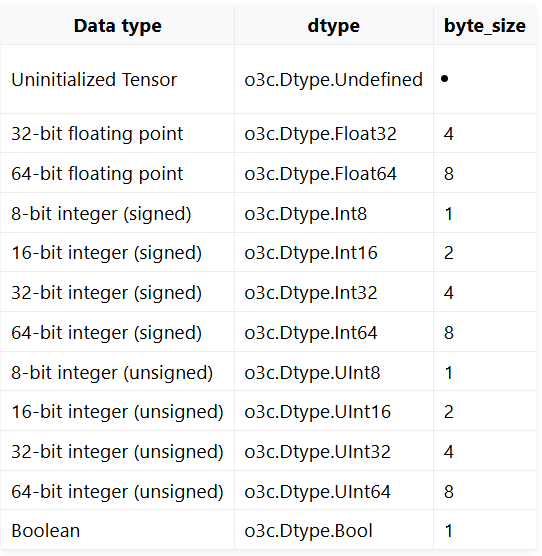

# 数据类型转换

In [17]:
# 浮点型转换成整型，精度会受损

float_tensor = o3c.Tensor([3.9, 4.8, 7.2])
int_tensor = float_tensor.to(o3c.Dtype.Int32)

print(float_tensor)
print(int_tensor)

[3.9 4.8 7.2]
Tensor[shape={3}, stride={1}, Float64, CPU:0, 0x5afee0599600]
[3 4 7]
Tensor[shape={3}, stride={1}, Int32, CPU:0, 0x5afee03dbb10]


In [32]:
# 整型转换成浮点型

int_tensor = o3c.Tensor([12, 34, 56])
float_tensor = int_tensor.to(o3c.Dtype.Float32)
print(int_tensor)
print('\n',float_tensor)

[12 34 56]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x5afee05da4a0]

 [12 34 56]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x5afee05b5610]


# 使用numpy创建tensor的内存问题

In [10]:
# 直接从numpy中创建tensor，不会共享内存
array1 = np.ones((3,4),dtype=np.int16)
tensor1 = o3c.Tensor(array1)
print(f"array1的值: {array1}")
print(f"tensor1的值: {tensor1}")
print("")

# 分别对array1和tensor1的某些元素进行改变
array1[1,2] += 100
tensor1[2,3] += 200
print(f"改变后array1的值: {array1}")
print(f"改变后tensor1的值: {tensor1}")
print("")
print("改变后，array1的值与tensor1的值并不一样")

array1的值: [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
tensor1的值: [[1 1 1 1],
 [1 1 1 1],
 [1 1 1 1]]
Tensor[shape={3, 4}, stride={4, 1}, Int16, CPU:0, 0x5ac69ed53770]

改变后array1的值: [[  1   1   1   1]
 [  1   1 101   1]
 [  1   1   1   1]]
改变后tensor1的值: [[1 1 1 1],
 [1 1 1 1],
 [1 1 1 201]]
Tensor[shape={3, 4}, stride={4, 1}, Int16, CPU:0, 0x5ac69ed53770]

改变后，array1的值与tensor1的值并不一样


In [12]:
# 使用内置方法from_numpy，则会共享内存
array1 = np.ones((3,4),dtype=np.int16)
tensor1 = o3c.Tensor.from_numpy(array1)

# 分别对array1和tensor1的某些元素进行改变
array1[1,2] += 50
tensor1[2,3] += 70
print(f"改变后array1的值: {array1}")
print(f"改变后tensor1的值: {tensor1}")
print("")
print("array1和tensor1的值一样，改变其中一个的值会对另一个产生同样的影响")

改变后array1的值: [[ 1  1  1  1]
 [ 1  1 51  1]
 [ 1  1  1 71]]
改变后tensor1的值: [[1 1 1 1],
 [1 1 51 1],
 [1 1 1 71]]
Tensor[shape={3, 4}, stride={4, 1}, Int16, CPU:0, 0x5ac69e3ae7b0]

array1和tensor1的值一样，改变其中一个的值会对另一个产生同样的影响


In [15]:
# 使用内置方法numpy()把tensor转换成numpy，同样会共享内存
tensor1 = o3c.Tensor([2, 1, 1, 9, 8, 5])
array1 = tensor1.numpy()

# 分别对array1和tensor1的某些元素进行改变
array1[1] += 50
tensor1[2] += 70
print(f"改变后array1的值: {array1}")
print(f"改变后tensor1的值: {tensor1}")
print("")
print("array1和tensor1的值一样，改变其中一个的值会对另一个产生同样的影响")

改变后array1的值: [ 2 51 71  9  8  5]
改变后tensor1的值: [2 51 71 9 8 5]
Tensor[shape={6}, stride={1}, Int64, CPU:0, 0x5ac69ee89560]

array1和tensor1的值一样，改变其中一个的值会对另一个产生同样的影响


# 加减乘除运算  
注意不同的tensor要放在同一个设备下才能进行运算

In [17]:
a = o3c.Tensor([2, 1, 1], dtype=o3c.Dtype.Float32)
b = o3c.Tensor([9, 8, 5], dtype=o3c.Dtype.Float32)
print("加法：a + b，结果为{}".format(a + b))
print("")
print("减法：a - b，结果为{}".format(a - b))
print("")
print("乘法：a * b，结果为{}".format(a * b))
print("")
print("除法：a / b，结果为{}".format(a / b))

加法：a + b，结果为[11 9 6]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x5ac69ed53770]

减法：a - b，结果为[-7 -7 -4]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x5ac69ed88c80]

乘法：a * b，结果为[18 8 5]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x5ac69ed53770]

除法：a / b，结果为[0.22222222 0.125 0.2]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x5ac69ed88c80]


In [29]:
# 与numpy一样也有广播机制

a = o3c.Tensor.ones((3, 4), dtype=o3c.Dtype.Float32)
b = o3c.Tensor.ones((4, ), dtype=o3c.Dtype.Float32)
print('a的形状',a.shape)
print('b的形状',b.shape)
print("a + b = \n{}".format(a + b))
print('维度不同，b会广播，以确保与a有相同的维度\n')

# 数据类型也会自动映射
c = o3c.Tensor.ones((4, ), dtype=o3c.Dtype.Float32)
print("1是int，c是float，c + 1 为 {}".format((c + 1).dtype))
print("True是bool类型，c是float，c + True 为 {}".format((c + True).dtype))  

print('')
# 支持简写
a -= True # 等价于 a = a-True
print("a = {}".format(a))

a的形状 SizeVector[3, 4]
b的形状 SizeVector[4]
a + b = 
[[2 2 2 2],
 [2 2 2 2],
 [2 2 2 2]]
Tensor[shape={3, 4}, stride={4, 1}, Float32, CPU:0, 0x5ac69d1c7f10]
维度不同，b会广播，以确保与a有相同的维度

1是int，c是float，c + 1 为 Float32
True是bool类型，c是float，c + True 为 Float32

a = [[0 0 0 0],
 [0 0 0 0],
 [0 0 0 0]]
Tensor[shape={3, 4}, stride={4, 1}, Float32, CPU:0, 0x5ac69eea8af0]


# 更多计算方式

In [10]:
tensor = o3c.Tensor([4, 9, 16], dtype=o3c.Dtype.Float32)

print("tensor的数值为{}\n".format(tensor))

print("使用tensor.sqrt()开方，结果为{}\n".format(tensor.sqrt()))

print("使用tensor.sin()计算正弦值{}\n".format(tensor.sin()))

print("使用tensor.cos()计算余弦值{}\n".format(tensor.cos()))

print("使用tensor.neg()计算负值，结果为{}\n".format(tensor.neg()))

print("使用tensor.exp()计算幂函数，结果为{}\n".format(tensor.exp()))

tensor = o3c.Tensor([-4, 9, -16], dtype=o3c.Dtype.Float32)
print("使用tensor.abs()计算绝对值，结果为{}\n".format(tensor.abs()))


tensor的数值为[4 9 16]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e311840f10]

使用tensor.sqrt()开方，结果为[2 3 4]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e31199dfd0]

使用tensor.sin()计算正弦值[-0.75680244 0.41211867 -0.2879029]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e3119600a0]

使用tensor.cos()计算余弦值[-0.65364367 -0.9111302 -0.9576596]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e31178dfd0]

使用tensor.neg()计算负值，结果为[-4 -9 -16]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e311a8aab0]

使用tensor.exp()计算幂函数，结果为[54.59815 8103.0835 8886111]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e311814170]

使用tensor.abs()计算绝对值，结果为[4 9 16]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x59e3119e1b70]



与numpy一样支持sum()、min()等方法的调用

In [12]:
tensor = o3c.Tensor([3, 4, 5], dtype=o3c.Dtype.Float32)

print("使用tensor.sum()求和，结果为{}\n".format(tensor.sum()))
print("使用tensor.min()返回最小值，结果为{}\n".format(tensor.min()))
print("使用tensor.ArgMax()返回最大值的索引，索引为{}\n".format(tensor.argmax()))

使用tensor.sum()求和，结果为12
Tensor[shape={}, stride={}, Float32, CPU:0, 0x59e311816ca0]

使用tensor.min()返回最小值，结果为3
Tensor[shape={}, stride={}, Float32, CPU:0, 0x59e31192dc00]

使用tensor.ArgMax()返回最大值的索引，索引为2
Tensor[shape={}, stride={}, Int64, CPU:0, 0x59e31180c4b0]



In [15]:
# 可以在指定维度上进行操作
tensor = o3c.Tensor(np.array(range(24)).reshape((2, 3, 4)))

print("在第0维上进行求和，结果为\n{}\n".format(tensor.sum(dim=(0))))
print("在(0, 2)维度上进行求和，结果为\n{}\n".format(tensor.sum(dim=(0, 2))))

# 保持维度
print("不保持原来的维度: {}".format(tensor.sum(dim=(0, 2)).shape))
print("保持原来的维度: {}".format(tensor.sum(dim=(0, 2), keepdim=True).shape))

在第0维上进行求和，结果为
[[12 14 16 18],
 [20 22 24 26],
 [28 30 32 34]]
Tensor[shape={3, 4}, stride={4, 1}, Int64, CPU:0, 0x59e311ab0660]

在(0, 2)维度上进行求和，结果为
[60 92 124]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x59e3117a0ab0]

不保持原来的维度: SizeVector[3]
保持原来的维度: SizeVector[1, 3, 1]


# 切片、索引、getitem(获取元素)和setitem(设置元素)  
操作与numpy类似

In [8]:
tensor = o3c.Tensor(np.array(range(24)).reshape((2, 3, 4)))
print("tensor的值为\n{}\n".format(tensor))

print('通过索引获取元素')
print("tensor[1, 2] = {}\n".format(tensor[1, 2]))

print('通过切片获取元素')
print("tensor[1:] = \n{}\n".format(tensor[1:]))

print('切片和索引可以一起使用')
print("tensor[:-1, 0:3:2, 2] = \n{}\n".format(tensor[:-1, 0:3:2, 2]))

tensor的值为
[[[0 1 2 3],
  [4 5 6 7],
  [8 9 10 11]],
 [[12 13 14 15],
  [16 17 18 19],
  [20 21 22 23]]]
Tensor[shape={2, 3, 4}, stride={12, 4, 1}, Int64, CPU:0, 0x5635d6d9f330]

通过索引获取元素
tensor[1, 2] = [20 21 22 23]
Tensor[shape={4}, stride={1}, Int64, CPU:0, 0x5635d6d9f3d0]

通过切片获取元素
tensor[1:] = 
[[[12 13 14 15],
  [16 17 18 19],
  [20 21 22 23]]]
Tensor[shape={1, 3, 4}, stride={12, 4, 1}, Int64, CPU:0, 0x5635d6d9f390]

切片和索引可以一起使用
tensor[:-1, 0:3:2, 2] = 
[[2 10]]
Tensor[shape={1, 2}, stride={12, 8}, Int64, CPU:0, 0x5635d6d9f340]



In [9]:
# 由tensor切片索引产生的tensor_copy与tensor共享内存
tensor_copy = tensor[:-1, 0:3:2, 2]
tensor_copy[0] += 100
print("tensor_copy的值为{}\n".format(tensor_copy))
print("tensor的值为\n{}".format(tensor))

tensor_copy的值为[[102 110]]
Tensor[shape={1, 2}, stride={12, 8}, Int64, CPU:0, 0x5635d6d9f340]

tensor的值为
[[[0 1 102 3],
  [4 5 6 7],
  [8 9 110 11]],
 [[12 13 14 15],
  [16 17 18 19],
  [20 21 22 23]]]
Tensor[shape={2, 3, 4}, stride={12, 4, 1}, Int64, CPU:0, 0x5635d6d9f330]


tensor的高级索引同样与numpy类似，具体可参考numpy的操作方式，这里不再过多详细介绍

# 逻辑运算

In [6]:
# 新建两个张量，用bool表示里面的元素

tensor1 = o3c.Tensor(np.array([True, False, True, False]))
tensor2 = o3c.Tensor(np.array([True, True, False, False]))

print("逻辑与 = {}\n".format(tensor1.logical_and(tensor2)))
print("逻辑或 = {}\n".format(tensor1.logical_or(tensor2)))
print("逻辑异或 = {}\n".format(tensor1.logical_xor(tensor2)))
print("逻辑非(取反) = {}\n".format(tensor1.logical_not()))

# 仅在布尔类型的张量中才能使用
print("tensor1.any(任意一个元素为True则返回True) = {}\n".format(tensor1.any()))
print("tensor1.all(所有元素为True则返回True) = {}\n".format(tensor1.all()))

# 如果张量不是布尔型，那么0代表False，其余非0元素代表True
tensor3 = o3c.Tensor(np.array([2.0, 0.0, 3.5, 0.0]))
tensor4 = o3c.Tensor(np.array([0.0, 3.0, 1.5, 0.0]))
print("tensor3 AND tensor4 = {}".format(tensor3.logical_and(tensor4)))

逻辑与 = [True False False False]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d344d1240]

逻辑或 = [True True True False]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d34695630]

逻辑异或 = [False True True False]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d344d1240]

逻辑非(取反) = [False True False True]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d34558070]

tensor1.any(任意一个元素为True则返回True) = True
Tensor[shape={}, stride={}, Bool, CPU:0, 0x572d345da1f0]

tensor1.all(所有元素为True则返回True) = False
Tensor[shape={}, stride={}, Bool, CPU:0, 0x572d344238b0]

tensor3 AND tensor4 = [False False True False]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d343d40e0]


In [12]:
tensor1 = o3c.Tensor(np.array([1, 2, 3, 4]), dtype=o3c.Dtype.Float64)
tensor2 = o3c.Tensor(np.array([1, 1.99999, 4, 4]))

print('tensor1和tensor2的整体误差在容忍度范围内就返回True，否则返回False')
print("allclose : {}\n".format(tensor1.allclose(tensor2)))

print('tensor1和tensor2的相同位置元素的误差在容忍度范围内就返回True，否则返回False')
print("isclose : {}\n".format(tensor1.isclose(tensor2)))

print('tensor1和tensor2相等就返回True，否则返回False')
print("issame : {}".format(tensor1.issame(tensor2)))

tensor1和tensor2的整体误差在容忍度范围内就返回True，否则返回False
allclose : False

tensor1和tensor2的相同位置元素的误差在容忍度范围内就返回True，否则返回False
isclose : [True True False True]
Tensor[shape={4}, stride={1}, Bool, CPU:0, 0x572d3451efd0]

tensor1和tensor2相等就返回True，否则返回False
issame : False


# 比较运算

In [15]:
tensor1 = o3c.Tensor([0, 1, -1])
tensor2 = o3c.Tensor([0, 0, 0])

print("tensor1 > tensor2 = {}\n".format(tensor1 > tensor2))
print("tensor1 >= tensor2 = {}\n".format(tensor1 >= tensor2))
print("tensor1 < tensor2 = {}\n".format(tensor1 < tensor2))
print("tensor1 <= tensor2 = {}\n".format(tensor1 <= tensor2))
print("tensor1 == tensor2 = {}\n".format(tensor1 == tensor2))
print("tensor1 != tensor2 = {}\n".format(tensor1 != tensor2))


tensor1 > tensor2 = [False True False]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3457a490]

tensor1 >= tensor2 = [True True False]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3451efd0]

tensor1 < tensor2 = [False False True]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3457a490]

tensor1 <= tensor2 = [True False True]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3451efd0]

tensor1 == tensor2 = [True False False]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3457a490]

tensor1 != tensor2 = [False True True]
Tensor[shape={3}, stride={1}, Bool, CPU:0, 0x572d3451efd0]



In [27]:
tensor = o3c.Tensor([[9, 0, 0], [0, 8, 0], [5, 0, 0]])

print("tensor的值\n{}\n".format(tensor))

print('nonzero()可以返回非零元素的索引')
print('tensor的非零元素索引为:9的索引=(0,0),8的索引=(1,1),5的索引=(2,0)\n')

print('如果as_tuple为False，则会将索引矩阵拆分为一个个向量，每个向量的内存地址不一致')
print("tensor.nonzero() = \n{}\n".format(tensor.nonzero()))

print('如果as_tuple为True，则索引矩阵不会进行拆分，每个向量的内存地址一致')
print("tensor.nonzero(as_tuple = 1) = \n{}".format(tensor.nonzero(as_tuple=1)))

tensor的值
[[9 0 0],
 [0 8 0],
 [5 0 0]]
Tensor[shape={3, 3}, stride={3, 1}, Int64, CPU:0, 0x572d3474d940]

nonzero()可以返回非零元素的索引
tensor的非零元素索引为:9的索引=(0,0),8的索引=(1,1),5的索引=(2,0)

如果as_tuple为False，则会将索引矩阵拆分为一个个向量，每个向量的内存地址不一致
tensor.nonzero() = 
[[0 1 2]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x572d343999b0], [0 1 0]
Tensor[shape={3}, stride={1}, Int64, CPU:0, 0x572d347f1550]]

如果as_tuple为True，则索引矩阵不会进行拆分，每个向量的内存地址一致
tensor.nonzero(as_tuple = 1) = 
[[0 1 2],
 [0 1 0]]
Tensor[shape={2, 3}, stride={3, 1}, Int64, CPU:0, 0x572d32236280]
